<a href="https://colab.research.google.com/github/map72ru/biz_learn/blob/main/HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import random
import scipy
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline

random.seed(42)


<a id='ab'></a>
##  A/B тестирование

A/B-тестирование (англ. A/B testing, Split testing) — метод маркетингового исследования, суть которого заключается в том, что контрольная группа элементов сравнивается с набором тестовых групп, в которых один или несколько показателей были изменены, для того, чтобы выяснить, какие из изменений улучшают целевой показатель и улучшают ли.

Типичное применение в веб-дизайне — исследование влияния цветовой схемы, расположения и размера элементов интерфейса на конверсию сайта.

Конверсия (Conversion Rate) в интернет-маркетинге — это отношение числа посетителей сайта, выполнивших на нём какие-либо целевые действия (покупку, регистрацию, подписку, посещение определённой страницы сайта, переход по рекламной ссылке), к общему числу посетителей сайта, выраженное в процентах. 



В теории принципы A/B тестирования невероятно просты:

- Выдвигаем предположение о том, что какое-то изменение (например, персонализация главной страницы) увеличит конверсию интернет-магазина.

- Создаем альтернативную версию сайта «Б» — копию исходной версии «А» с изменениями, от которых мы ждем роста эффективности сайта.

- Всех посетителей сайта случайным образом делим на две равные группы: одной группе показываем исходный вариант (контрольная группа) , второй группе (тестовой) — альтернативный. Одновременно измеряем конверсию для обеих версий сайта.

- Определяем статистически достоверно победивший вариант.

Мы будем анализировать результаты A/B тестирования двух версий дизайна кнопки сайта интернет-магазина. 

Целевым действием считаем клик по этой кнопке. 

Первые три этапа А/В тестирования за нас провели, результаты предоставили в виде файла ab_dataset.csv. Нам осталось выполнить четвертый пункт.

**Задание **

Провести аналогичные исследования но для чека покупок клиентов (колонки `revenue`)  
в интернет магазине есть 2-ва типа продуктов:
* 100 руб.
* 250 руб.

ну и конечно клиент может ничего не купить  
провести исследование изменился ли средний чек

 <a id='eda'></a>
### Первичный анализ данных

Прочитаем данные из файла `ab_datas.csv`. Сохраним их в датафрейм `df`. 

Прочитаем данные и посмотрим на первые 5 строк:

In [1]:
from google.colab import drive
drive.mount('/content/hw2')

Mounted at /content/hw2


In [4]:
df = pd.read_csv('hw2/MyDrive/data/ab_datas.csv')

df.head()

,user_id,timestamp,group,landing_page,converted,revenue
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,100
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,250


Посмотрим, сколько посетителей заходио на сайт (количество строк в нашем датафрейме)

In [5]:
#количество посетителей всего

n_rows = df.shape[0]
print("Число строк: {}".format(n_rows))

Число строк: 294478


Сколько уникальных пользователей (уникальных `user_id`) в датасете?

In [6]:
user_total = df.nunique()['user_id']
print("Число уникальных пользователей : {}".format(user_total))

Число уникальных пользователей : 290584


Посетителей из контрольной `control` группы должны были направлять на страницу в старом дизайне  `old_page` , пользователей из тестовой группы `treatment` - на страницу в новом дизайне `new_page`. Проверим, были ли ошибки при направлении.

In [7]:
mismatch_1 = df.query("group == 'treatment' and landing_page == 'old_page'")
print("Из тестовой группы неверно направлены {}".format(len(mismatch_1)) + " пользователей")

mismatch_2 = df.query("group == 'control' and landing_page == 'new_page'")
print("Из контрольной группы неверно направлены  {}".format(len(mismatch_2)) + " пользователей")


Из тестовой группы неверно направлены 1965 пользователей
Из контрольной группы неверно направлены  1928 пользователей


Выясним, есть ли в данных пропуски.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
 5   revenue       294478 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 13.5+ MB


Из сообщений следует, что пропущенных значений нет.

In [11]:
df_grp = df.groupby('group')
df_grp.describe()

user_id                               ... revenue              
              count           mean           std  ...     50%    75%    max
group                                             ...                      
control    147202.0  788123.098035  91278.896888  ...     0.0  250.0  250.0
treatment  147276.0  787825.226283  91142.800641  ...   100.0  250.0  250.0

[2 rows x 24 columns]

Ответы на остальные вопросы можно найти, например, так:

In [40]:
#объем тестовой группы
n_rows_treat = len(df[(df['group'] == 'treatment')])

#объем контрольной группы
n_rows_contr = len(df[(df['group'] == 'control')])

print("Соотношение размеров тестовой и контрольной групп: {}".format(n_rows_treat/n_rows_contr))



Соотношение размеров тестовой и контрольной групп: 1.0005027105609978


**Задание **

А теперь ответьте на главный вопрос данного этапа:  выявил ли предварительный анализ, что дизайн кнопки влияет на конверсию и если да, то как именно?

****Ответ****

Предварительно, можно сказать, что ноый дизайн улучшает продажи. Учеличилось среднее значение продаж примерно на 16% при примерно одинковом количестве кликов на старом и новом дизайне.

<a id='si1'></a>
#### Формулировка рабочей гипотезы

Нулевая гипотеза: "Новый дизайн кнопки увеличивает объем продаж"
Альтернативная гипотеза: "Новый дизайн кнопки не увеличивает объем продаж"

<a id='si2'></a>
#### Формальное описание нулевой и альтернативной гипотез

$H_{0}$ : $\theta_{new}$ > $\theta_{old}$ 

$H_{1}$ : $\theta_{new}$ <= $\theta_{old}$ 

<a id='si4'></a>
#### Проведение вычислений. $Z$-критерий.

In [49]:
#Z-статистика
import statsmodels.api as sm
import statsmodels

convert_contr = len(df.query("group == 'control' and revenue > 0"))
convert_treat = len(df.query("group == 'treatment' and revenue > 0"))
print(convert_contr, convert_treat, n_rows_treat, n_rows_contr)

z_score, p_value = sm.stats.proportions_ztest([convert_treat, convert_contr], [n_rows_treat, n_rows_contr], 
                                              alternative='smaller')

print("Z-статистика={},  p_value={}".format(z_score, p_value))


73401 98077 147276 147202
Z-статистика=92.04185904290561,  p_value=1.0


#### Проведение вычислений. $T$-test.

In [46]:
t_score, p_value, _ = statsmodels.stats.weightstats.ttest_ind(df.query("group == 'control' and revenue > 0")['revenue'],
                                                              df.query("group == 'treatment' and revenue > 0")['revenue'],
                                                              alternative="smaller",
                                                              usevar='unequal')
print("T-статистика={},  p_value={}".format(t_score, p_value))

T-статистика=1.1071248128459827,  p_value=0.8658791733007649


#### Проведение вычислений. $Mann–Whitney$-test.

In [52]:
w_score, p_value = scipy.stats.mannwhitneyu(df.query("group == 'control' and revenue > 0")['converted'], 
                         df.query("group == 'treatment' and revenue > 0")['converted'],
                         alternative="less")

In [53]:
print("W-статистика={},  p_value={}".format(w_score, p_value))

W-статистика=3602757798.5,  p_value=0.7176161513900458


**Задание **

Посмотрели на результаты стат тестов, какая гипотеза оказалась верна

**Ответ**

Поскольку p-value достаточно большой, то делаем вывод, что нулевая гипотеза верна: новый дизайн улучшает объем продаж сайта.

<a id='m12'></a>
### Ошибки первого и второго рода

|  | | | |
|----------|:---------|:--------|:---------|
|  | | 	Верная гипотеза: | |
|  |     | $H_0$   | $H_1$    |
| Результат применения критерия: | $H_0$   |$H_0$ верно принята  |$H_0$ неверно принята (ошибка II рода)  |  
|  |$H_1$   |$H_0$ неверно отвергнута(ошибка I рода)  | $H_0$ верно отвергнута   |



Уровень значимости (статистическая значимость, statistical significance) $\alpha$ - это и есть вероятность ошибки первого рода, т. е. вероятность принятия альтернативной гипотезы при условии, что на самом деле верна нулевая гипотеза. 

Обозначим  $\beta$  вероятность ошибки второго рода. 

Величина  $1-\beta$ называется *статистической мощностью* (statistical power) критерия. По сути мощность показывает, сколько значений, соответствующих альтернативной гипотезе, мы действительно отнесем к альтернативной гипотезе

![asd](https://habrastorage.org/files/475/9e5/ebc/4759e5ebcfc54b11a852704017d2d8ac.png)

## bootstrap  
Сделаем стат выводы при помощи bootstrap-а

In [64]:
df.head()

,user_id,timestamp,group,landing_page,converted,revenue
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,100
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,250


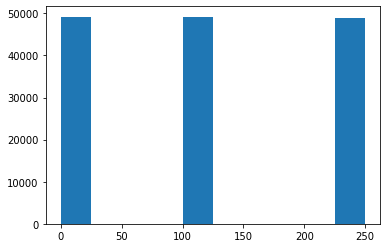

In [54]:
plt.hist(df.loc[df['group']=='treatment', 'revenue']);

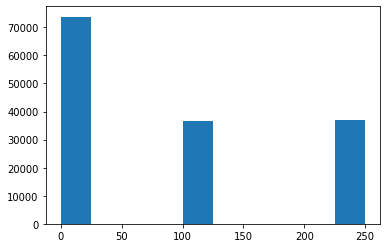

In [55]:
plt.hist(df.loc[df['group']=='control', 'revenue']);

In [56]:
b = df.loc[df['group']=='treatment', 'revenue'].values
a = df.loc[df['group']=='control', 'revenue'].values

In [57]:
from sklearn.utils import resample

a_means = []
b_means = []

for i in range(10000):
    a_boot = resample(a, replace=True, n_samples=len(a))
    b_boot = resample(b, replace=True, n_samples=len(b))
    
    a_means.append(a_boot.mean())
    b_means.append(b_boot.mean())
    
a_means = np.array(a_means)
b_means = np.array(b_means)

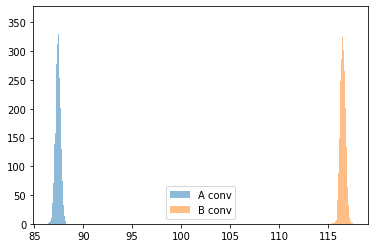

In [58]:
plt.hist(a_means, label='A conv', alpha=0.5, bins=100)
plt.hist(b_means, label='B conv', alpha=0.5, bins=100)

plt.legend()
plt.show()

In [59]:
# доверительный интервал
np.percentile(a_means, 2.5), np.percentile(a_means, 97.5)

(86.90131587886033, 87.94275892990585)

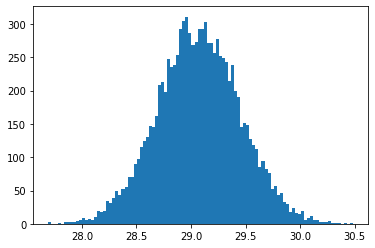

In [67]:
plt.hist(b_means - a_means, bins=100)
plt.show()

In [68]:
# сделаем оценку на p_value
dff = b_means - a_means

len(dff[dff>=0])/len(dff)

1.0

In [69]:
dff

array([28.58584546, 28.83227777, 28.79807204, ..., 29.28099269,
       28.95036032, 28.28572031])